In [34]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import scorer
from pandas_datareader import data as web
from matplotlib.pylab import plt

In [2]:
Df=web.DataReader('SPY',data_source='yahoo')
Df=Df[['Open','High','Low','Close']]

In [4]:
Df

Open        High         Low       Close        high  \
Date                                                                     
2009-12-31  112.769997  112.800003  111.389999  111.440002         NaN   
2010-01-04  112.370003  113.389999  111.510002  113.330002  112.800003   
2010-01-05  113.260002  113.680000  112.849998  113.629997  113.389999   
2010-01-06  113.519997  113.989998  113.430000  113.709999  113.680000   
2010-01-07  113.500000  114.330002  113.180000  114.190002  113.989998   
2010-01-08  113.889999  114.620003  113.660004  114.570000  114.330002   
2010-01-11  115.080002  115.129997  114.239998  114.730003  114.620003   
2010-01-12  113.970001  114.209999  113.220001  113.660004  115.129997   
2010-01-13  113.949997  114.940002  113.370003  114.620003  114.209999   
2010-01-14  114.489998  115.139999  114.419998  114.930000  114.940002   
2010-01-15  114.730003  114.839996  113.199997  113.639999  115.139999   
2010-01-19  113.620003  115.129997  113.589996  115.059998  114.839996   
2010-01-20  114.279999  114.449997  112.980003  113.889999  115.129997   
2010-01-21  113.919998  114.269997  111.559998  111.699997  114.449997   
2010-01-22  111.199997  111.739998  109.089996  109.209999  114.269997   
2010-01-25  110.209999  110.410004  109.410004  109.769997  111.739998   
2010-01-26  109.339996  110.470001  109.040001  109.309998  110.410004   
2010-01-27  109.169998  110.080002  108.330002  109.830002  110.470001   
2010-01-28  110.190002  110.250000  107.910004  108.570000  110.080002   
2010-01-29  109.040001  109.800003  107.220001  107.389999  110.250000   
2010-02-01  108.150002  109.070000  107.500000  109.059998  109.800003   
2010-02-02  109.260002  110.589996  108.879997  110.379997  109.070000   
2010-02-03  109.879997  110.480003  109.510002  109.830002  110.589996   
2010-02-04  108.980003  109.029999  106.419998  106.440002  110.480003   
2010-02-05  106.559998  106.879997  104.580002  106.660004  109.029999   
2010-02-08  106.739998  107.330002  105.809998  105.889999  106.879997   
2010-02-09  107.129997  108.150002  106.269997  107.220001  107.330002   
2010-02-10  107.050003  107.599998  106.110001  107.010002  108.150002   
2010-02-11  106.870003  108.250000  106.250000  108.129997  107.599998   
2010-02-12  106.989998  108.099998  106.510002  108.040001  108.250000   
...                ...         ...         ...         ...         ...   
2019-02-15  276.359985  277.410004  276.130005  277.369995  275.640015   
2019-02-19  276.480011  278.579987  276.470001  277.850006  277.410004   
2019-02-20  277.809998  278.920013  277.250000  278.410004  278.579987   
2019-02-21  277.700012  278.100006  276.350006  277.420013  278.920013   
2019-02-22  278.109985  279.359985  277.399994  279.140015  278.100006   
2019-02-25  280.730011  281.309998  279.429993  279.519989  279.359985   
2019-02-26  279.130005  280.299988  278.899994  279.320007  281.309998   
2019-02-27  278.519989  279.589996  277.480011  279.200012  280.299988   
2019-02-28  278.959991  279.450012  278.320007  278.679993  279.589996   
2019-03-01  280.440002  280.880005  278.820007  280.420013  279.450012   
2019-03-04  281.600006  281.869995  276.839996  279.399994  280.880005   
2019-03-05  279.540009  279.760010  278.410004  279.019989  281.869995   
2019-03-06  279.149994  279.160004  276.970001  277.329987  279.760010   
2019-03-07  276.829987  276.989990  274.070007  275.010010  279.160004   
2019-03-08  272.940002  274.649994  272.420013  274.459991  276.989990   
2019-03-11  275.260010  278.619995  275.230011  278.440002  274.649994   
2019-03-12  279.059998  280.070007  278.850006  279.489990  278.619995   
2019-03-13  280.480011  282.380005  280.299988  281.339996  280.070007   
2019-03-14  281.369995  281.839996  280.670013  281.160004  282.380005   
2019-03-15  280.540009  282.209991  280.329987  281.309998  281.839996   
2019-03-18  281.549988  282.660004  281.299988  282.329987  282.209991   
2019-03-19  283.510010

In [3]:
Df['high']=Df['High'].shift(1)
Df['low']=Df['Low'].shift(1)
Df['close']=Df['Close'].shift(1)
Df['Signal']=1
Df['Signal'][Df['Open'].shift(-1)<Df['Open']]=-1

/home/vikas/projects/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now let us import the OHLC data of the stock SPY into a dataframe called Df. Now let us shift the high, low and close values by one day, so that we get only the past data for these features. Next, let us create a signal column to show the trend of the day. Here signal would be -1, if the market experiences a drop in value on an Open to Open basis.

In [5]:
print(Df.head())

                  Open        High         Low       Close        high  \
Date                                                                     
2009-12-31  112.769997  112.800003  111.389999  111.440002         NaN   
2010-01-04  112.370003  113.389999  111.510002  113.330002  112.800003   
2010-01-05  113.260002  113.680000  112.849998  113.629997  113.389999   
2010-01-06  113.519997  113.989998  113.430000  113.709999  113.680000   
2010-01-07  113.500000  114.330002  113.180000  114.190002  113.989998   

                   low       close  Signal  
Date                                        
2009-12-31         NaN         NaN      -1  
2010-01-04  111.389999  111.440002       1  
2010-01-05  111.510002  113.330002       1  
2010-01-06  112.849998  113.629997      -1  
2010-01-07  113.430000  113.709999       1  


In [6]:
Df=Df.dropna()
print(Df.head())

                  Open        High         Low       Close        high  \
Date                                                                     
2010-01-04  112.370003  113.389999  111.510002  113.330002  112.800003   
2010-01-05  113.260002  113.680000  112.849998  113.629997  113.389999   
2010-01-06  113.519997  113.989998  113.430000  113.709999  113.680000   
2010-01-07  113.500000  114.330002  113.180000  114.190002  113.989998   
2010-01-08  113.889999  114.620003  113.660004  114.570000  114.330002   

                   low       close  Signal  
Date                                        
2010-01-04  111.389999  111.440002       1  
2010-01-05  111.510002  113.330002       1  
2010-01-06  112.849998  113.629997      -1  
2010-01-07  113.430000  113.709999       1  
2010-01-08  113.180000  114.190002       1  


In [7]:
X=Df[['Open','High','Low','Close']]

In [8]:
y=Df['Signal']

In [9]:
X

Open        High         Low       Close
Date                                                      
2010-01-04  112.370003  113.389999  111.510002  113.330002
2010-01-05  113.260002  113.680000  112.849998  113.629997
2010-01-06  113.519997  113.989998  113.430000  113.709999
2010-01-07  113.500000  114.330002  113.180000  114.190002
2010-01-08  113.889999  114.620003  113.660004  114.570000
2010-01-11  115.080002  115.129997  114.239998  114.730003
2010-01-12  113.970001  114.209999  113.220001  113.660004
2010-01-13  113.949997  114.940002  113.370003  114.620003
2010-01-14  114.489998  115.139999  114.419998  114.930000
2010-01-15  114.730003  114.839996  113.199997  113.639999
2010-01-19  113.620003  115.129997  113.589996  115.059998
2010-01-20  114.279999  114.449997  112.980003  113.889999
2010-01-21  113.919998  114.269997  111.559998  111.699997
2010-01-22  111.199997  111.739998  109.089996  109.209999
2010-01-25  110.209999  110.410004  109.410004  109.769997
2010-01-26  109.339996  110.470001  109.040001  109.309998
2010-01-27  109.169998  110.080002  108.330002  109.830002
2010-01-28  110.190002  110.250000  107.910004  108.570000
2010-01-29  109.040001  109.800003  107.220001  107.389999
2010-02-01  108.150002  109.070000  107.500000  109.059998
2010-02-02  109.260002  110.589996  108.879997  110.379997
2010-02-03  109.879997  110.480003  109.510002  109.830002
2010-02-04  108.980003  109.029999  106.419998  106.440002
2010-02-05  106.559998  106.879997  104.580002  106.660004
2010-02-08  106.739998  107.330002  105.809998  105.889999
2010-02-09  107.129997  108.150002  106.269997  107.220001
2010-02-10  107.050003  107.599998  106.110001  107.010002
2010-02-11  106.870003  108.250000  106.250000  108.129997
2010-02-12  106.989998  108.099998  106.510002  108.040001
2010-02-16  108.860001  109.849998  107.820000  109.739998
...                ...         ...         ...         ...
2019-02-15  276.359985  277.410004  276.130005  277.369995
2019-02-19  276.480011  278.579987  276.470001  277.850006
2019-02-20  277.809998  278.920013  277.250000  278.410004
2019-02-21  277.700012  278.100006  276.350006  277.420013
2019-02-22  278.109985  279.359985  277.399994  279.140015
2019-02-25  280.730011  281.309998  279.429993  279.519989
2019-02-26  279.130005  280.299988  278.899994  279.320007
2019-02-27  278.519989  279.589996  277.480011  279.200012
2019-02-28  278.959991  279.450012  278.320007  278.679993
2019-03-01  280.440002  280.880005  278.820007  280.420013
2019-03-04  281.600006  281.869995  276.839996  279.399994
2019-03-05  279.540009  279.760010  278.410004  279.019989
2019-03-06  279.149994  279.160004  276.970001  277.329987
2019-03-07  276.829987  276.989990  274.070007  275.010010
2019-03-08  272.940002  274.649994  272.420013  274.459991
2019-03-11  275.260010  278.619995  275.230011  278.440002
2019-03-12  279.059998  280.070007  278.850006  279.489990
2019-03-13  280.480011  282.380005  280.299988  281.339996
2019-03-14  281.369995  281.839996  280.670013  281.160004
2019-03-15  280.540009  282.209991  280.329987  281.309998
2019-03-18  281.549988  282.660004  281.299988  282.329987
2019-03-19  283.510010  284.359985  281.410004  282.399994
2019-03-20  282.160004  283.500000  280.320007  281.549988
2019-03-21  280.640015  285.179993  280.589996  284.730011
2019-03-22  283.220001  283.799988  279.179993  279.250000
2019-03-25  278.869995  280.190002  277.640015  279.040009
2019-03-26  280.989990  282.179993  279.559998  281.119995
2019-03-27  281.109985  281.760010  277.929993  279.649994
2019-03-28  280.350006  281.209991  279.070007  280.709991
2019-03-29  282.390015  282.839996  281.140015  282.480011

[2325 rows x 4 columns]

In [10]:
t=0.8
split=int(t*len(Df))

In [11]:
reg=SVC(C=1,cache_size=200,class_weight=None,coef0=0,
        decision_function_shape=None,degree=3,gamma='auto',kernel='rbf',max_iter=1000,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)

In [12]:
reg

SVC(C=1, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
reg.fit(X[:split],y[:split])

/home/vikas/projects/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_predict=reg.predict(X[split:])

In [15]:
y_predict

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [16]:
Df=Df.assign(P_trend=pd.Series(np.zeros(len(X))).values)

In [17]:
Df['P_trend'][split:]=y_predict

/home/vikas/projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
accuracy=scorer.accuracy_score(Df['Signal'][split:],Df['P_trend'][split:])

In [19]:
Df=Df.assign(Ret=pd.Series(np.zeros(len(X))).values)
Df['Ret']=np.log(Df['Open'].shift(-1)/Df['Open'])

In [20]:
Df=Df.assign(Ret1=pd.Series(np.zeros(len(X))).values)
Df['Ret1']=Df['P_trend']*Df['Ret']

In [21]:
Df=Df.assign(Cu_Ret1=pd.Series(np.zeros(len(X))).values)
Df['Cu_Ret1']=np.cumsum(Df['Ret1'][split:])

In [22]:
Df=Df.assign(Cu_Ret=pd.Series(np.zeros(len(X))).values)
Df['Cu_Ret']=np.cumsum(Df['Ret'][split:])

In [23]:
std=pd.expanding_std(Df['Cu_Ret1'])
sharpe=(Df['Cu_Ret1']-Df['Cu_Ret'])/std

/home/vikas/projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.expanding_std is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).std()
  """Entry point for launching an IPython kernel.


In [26]:
sharpe=sharpe[split:].mean()

In [27]:
sharpe

0.21076496091154923

In [28]:
print("\n\nAccuracy",accuracy)



Accuracy 0.578494623655914


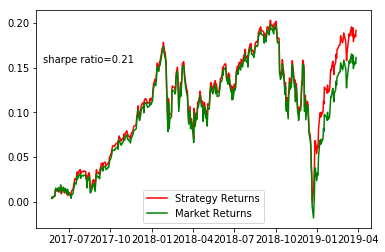

In [38]:
plt.plot(Df['Cu_Ret1'],color='r',label='Strategy Returns')
plt.plot(Df['Cu_Ret'],color='g',label='Market Returns')
plt.figtext(0.14,0.7,s='sharpe ratio=%.2f'%sharpe)
plt.legend(loc='best')